In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

pd.options.display.float_format = '{:,.2f}'.format

In [8]:
from importlib import reload

In [6]:
import wrangle as wr

In [9]:
reload(wr)

<module 'wrangle' from '/Users/nadina/codeup-data-science/cisco-time-series-analysis/nadia_docs/wrangle.py'>

#### Acquire the data

In [28]:
df = wr.acquire_data()

## Order Date vs Shipping date

#### Order date as an index

In [73]:
df = wr.acquire_data()

In [57]:
df.shape

(378523, 42)

In [74]:
df.order_date = pd.to_datetime(df.order_date)
df.order_date.min(), df.order_date.max()

(Timestamp('2014-05-06 00:00:00'), Timestamp('2022-11-29 00:00:00'))

In [75]:
df.shipped_date = pd.to_datetime(df.shipped_date)
df.shipped_date.min(), df.shipped_date.max()

(Timestamp('2014-05-20 00:00:00'), Timestamp('2022-11-30 00:00:00'))

In [88]:
df = wr.acquire_data()
# Reassign the order_date column to be a datetime type
df.order_date = pd.to_datetime(df.order_date)

# Set the index as that date and then sort index (by the date)
df = df.set_index("order_date").sort_index()
df = df.loc['2018':]
train = df.loc[:'2021']
test = df.loc['2022':]
pd.concat([train.head(1), train.tail(1), test.head(1)], axis=0)

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
order_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018,Odem-Edroy Independent School District,"Cisco Systems, Inc.","4,532.00",DIR-TSO-2542,Cisco Branded Equipment and Related Services,DIR-TSO-TMP-215,K-12,Accounts Payable,Po Box 727,...,385718,173494,01/11/2018,Mario Gutierrez,Networking Equipment,Networking Equipment,05/05/2014,07/04/2018,07/04/2018,34581093
2021-12-31,2022,Houston TranStar,"Cisco Systems, Inc.",369.89,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,2800 Post Oak Blvd,...,6013222000141,601330000083759,01/04/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,51809407
2022-01-01,2022,Teacher Retirement System of Texas,"Cisco Systems, Inc.",872.56,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,1000 Red River,...,6013222005012,PO000692,04/28/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,53605297


In [76]:
df['order_shipping_diff'] = df.shipped_date - df.order_date

In [85]:
df[df.order_shipping_diff < '0 days'][['customer_name', 'customer_type', 'purchase_amount', 'order_shipping_diff']]

,customer_name,customer_type,purchase_amount,order_shipping_diff
2215326,Brazos County,Local Government,"12,760.00",-4 days
2215327,Brazos County,Local Government,"1,411.00",-5 days
2215328,Brazos County,Local Government,"2,093.00",-5 days
2215329,Brazos County,Local Government,944.16,-4 days
2215330,Brazos County,Local Government,"2,252.26",-7 days
...,...,...,...,...
3729335,Galena Park Independent School District,K-12,158.10,-4 days
3732515,Collin County Community College District,Higher Ed,"10,089.00",-29 days
3732939,Goose Creek Consolidated Independent School Di...,K-12,267.00,-8 days
3732942,Goose Creek Consolidated Independent School Di...,K-12,267.00,-8 days


In [77]:
df.order_shipping_diff.describe()

count                        378523
mean     38 days 14:16:35.175458295
std      67 days 04:37:23.094158562
min             -368 days +00:00:00
25%                 7 days 00:00:00
50%                17 days 00:00:00
75%                40 days 00:00:00
max              1741 days 00:00:00
Name: order_shipping_diff, dtype: object

In [53]:
df.tail(1)

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
order_date,,,,,,,,,,,,,,,,,,,,,
2022-11-29,2023,Montgomery County Emergency Communications Dis...,"Cisco Systems, Inc.","1,376.48",DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,Local Government,Accounts Payable,Po Box 1830,...,FJ59539,66979,11/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55908758


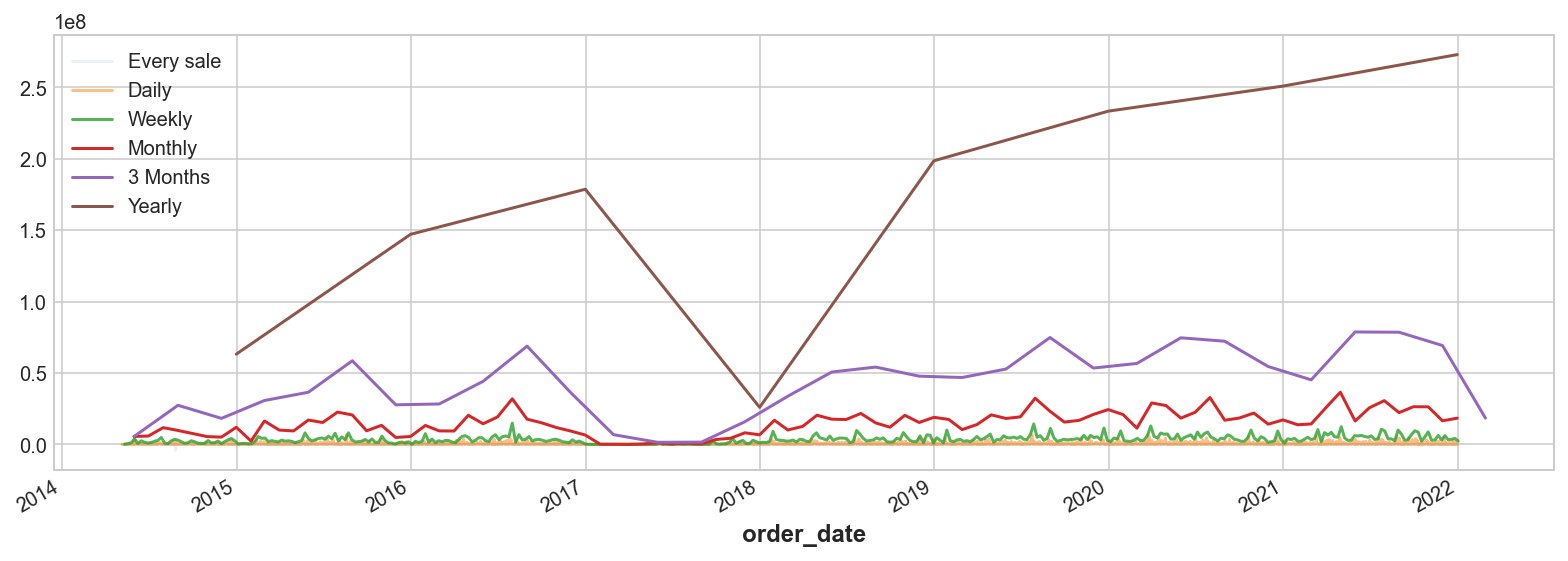

In [33]:
ts = train.purchase_amount
ts.plot(alpha=.1, label='Every sale')
ts.resample('D').sum().plot(alpha=.5, label='Daily')
ts.resample('W').sum().plot(alpha=.8, label='Weekly')
ts.resample('M').sum().plot(label='Monthly')
ts.resample('3M').sum().plot(label='3 Months')
ts.resample('Y').sum().plot(label='Yearly')
plt.legend()
plt.show()

In [90]:
#df.loc['2018']

#### Shipped date as an index

In [35]:
df = wr.acquire_data()
# Reassign the order_date column to be a datetime type
df.order_date = pd.to_datetime(df.order_date)

# Set the index as that date and then sort index (by the date)
df = df.set_index("shipped_date").sort_index()
train = df.loc[:'2021']
test = df.loc['2022':]
pd.concat([train.tail(1), test.head(1)], axis=0)b

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,invoice_number,po_number,order_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
shipped_date,,,,,,,,,,,,,,,,,,,,,
12/31/2021,2022,Alice Independent School District,"Cisco Systems, Inc.",169.80,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,1801 E Main St,...,1100904507,7302200108,2021-11-12,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,51426627


In [91]:
#df.head()

#### Takeaway: we go with the order date as the index
Order date is the date when actually the payment happens

#### Basic clean
- Remove the columns that I think we don't need
- Turn into date type
- Set shipping date as an index

In [190]:
# acquire the data
df = wr.acquire_data()

In [191]:
# collect columns, that we do not need
drop_columns = ['vendor_name', 'contract_number', 'rfo_number',
               'customer_contact', 'customer_address',  'customer_state', 'customer_zip',
               'vendor_contact', 'vendor_hub_type', 'vendor_address', 'vendor_city', 'vendor_state', 'vendor_zip',
               'reseller_address', 'reseller_city', 'reseller_state', 'reseller_zip', 'reseller_phone',
                'dir_contract_mgr', #'invoice_number', 'po_number', 'dir_contract_mgr', 'customer_city',
               'contract_type', 'contract_subtype', 'sales_fact_number']
df.drop(drop_columns, axis=1, inplace=True)

# create a copy for the shipped date
df['order_date_copy'] = df.order_date

# convert order date and shpping date to datetime
df.order_date = pd.to_datetime(df.order_date)
df.shipped_date = pd.to_datetime(df.shipped_date)
df.order_date_copy = pd.to_datetime(df.order_date_copy)

# save the shipped date as index
df = df.set_index('order_date').sort_index()

# data doesn't have enough info about 2017, so we starts from 2018
df = df.loc['2018':]

# unneeded columns after 2nd round of explore
drop_columns1 = ['rfo_description', 'reseller_hub_type', 'report_received_month', 'brand_name', 'purchase_month', 
                 'contract_start_date', 'contract_end_date', 'contract_termination_date']
df.drop(drop_columns1, axis=1, inplace=True)

In [171]:
df.head(1)

,fiscal_year,customer_name,purchase_amount,customer_type,reseller_name,order_quantity,unit_price,invoice_number,shipped_date,order_date_copy
order_date,,,,,,,,,,
2018-01-02,2018,Odem-Edroy Independent School District,"4,532.00",K-12,Great South Texas Corporation dba Computer Sol...,16.00,283.25,385718,2018-01-11,2018-01-02


### Functions to get the summary information

In [98]:
def get_customer_summary(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Creates a pandas data frame with the summary information for every customer:
    - total/min/max/average purchase amount
    - min/max order date
    - min/max shipped date
    
    Parameters:
        df: data frame with data from DIR
    Returns:
        pandas data frame
    '''
    # create a customer summury
    # collect the purchase amount information: total, min, max and average purchase amount
    customer_summary = df.groupby(by='customer_name').purchase_amount.agg(['sum', 'min', 'max', 'mean'])
    # rename columns
    customer_summary.rename(columns={'sum':'total_purchase_amount', 'min':'min_purchase_amount', 
                             'max':'max_purchase amount', 'mean':'average_purchase_amount'},inplace=True)
    # add order date information: first and last order date
    customer_summary = pd.concat([customer_summary,
                           df.groupby(by='customer_name').order_date_copy.agg(['min', 'max'])], axis=1)
    # rename columns
    customer_summary.rename(columns={'min':'min_order_date', 
                                 'max':'max_order_date'},inplace=True)
    # add shipping date information: first and last shipping date
    customer_summary = pd.concat([customer_summary,
                           df.groupby(by='customer_name').shipped_date.agg(['min', 'max'])], axis=1)
    # rename columns
    customer_summary.rename(columns={'min':'min_shipping_date', 
                                 'max':'max_shipping_date'},inplace=True)
    return customer_summary

In [100]:
#get_customer_summary(df)

In [101]:
def get_reseller_summary(df:pd.DataFrame) -> pd.DataFrame:
    '''
    Creates a pandas data frame with the summary information for every reseller:
    - total/min/max/average purchase amount
    - min/max order date
    - min/max shipped date
    
    Parameters:
        df: data frame with data from DIR
    Returns:
        pandas data frame
    '''
    # create a reseller summary
    # collect the purchase amount information: total, min, max and average purchase amount
    reseller_summary = df.groupby(by='reseller_name').purchase_amount.agg(['sum', 'min', 'max', 'mean'])
    # rename columns
    reseller_summary.rename(columns={'sum':'total_purchase_amount', 'min':'min_purchase_amount', 
                             'max':'max_purchase amount', 'mean':'average_purchase_amount'},inplace=True)
    # add order date information: first and last order date
    reseller_summary = pd.concat([reseller_summary,
               df.groupby(by='reseller_name').order_date_copy.agg(['min', 'max'])], axis=1)
    # rename columns
    reseller_summary.rename(columns={'min':'min_order_date', 
                                 'max':'max_order_date'},inplace=True)
    # add shipping date information: first and last shipping date
    reseller_summary = pd.concat([reseller_summary,
                                df.groupby(by='reseller_name').shipped_date.agg(['min', 'max'])], axis=1)
    # rename columns
    reseller_summary.rename(columns={'min':'min_shipping_date', 
                                 'max':'max_shipping_date'},inplace=True)
    return reseller_summary

In [103]:
#get_reseller_summary(df)

In [104]:
def get_customer_type_summary(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Creates a pandas data frame with the summary information for every customer type:
    - total/min/max/average purchase amount
    - min/max order date
    - min/max shipped date
    
    Parameters:
        df: data frame with data from DIR
    Returns:
        pandas data frame
    '''
    # create a customer type summury
    # collect the purchase amount information: total, min, max and average purchase amount
    customer_type_summary = df.groupby(by='customer_type').purchase_amount.agg(['sum', 'min', 'max', 'mean'])
    # rename columns
    customer_type_summary.rename(columns={'sum':'total_purchase_amount', 'min':'min_purchase_amount', 
                             'max':'max_purchase amount', 'mean':'average_purchase_amount'},inplace=True)
    # add order date information: first and last order date
    customer_type_summary = pd.concat([customer_type_summary,
                           df.groupby(by='customer_type').order_date_copy.agg(['min', 'max'])], axis=1)
    # rename columns
    customer_type_summary.rename(columns={'min':'min_order_date', 
                                 'max':'max_order_date'},inplace=True)
    # add shipping date information: first and last shipping date
    customer_type_summary = pd.concat([customer_type_summary,
                           df.groupby(by='customer_type').shipped_date.agg(['min', 'max'])], axis=1)
    # rename columns
    customer_type_summary.rename(columns={'min':'min_shipping_date', 
                                 'max':'max_shipping_date'},inplace=True)
    return customer_type_summary

In [105]:
get_customer_type_summary(df)

,total_purchase_amount,min_purchase_amount,max_purchase amount,average_purchase_amount,min_order_date,max_order_date,min_shipping_date,max_shipping_date
customer_type,,,,,,,,
Assistance Org,"1,838,294.15",-825.10,"101,420.58","3,468.48",2018-01-11,2022-10-21,2018-01-12,2022-10-24
Higher Ed,"225,895,015.84","-200,583.00","1,001,346.40","5,152.01",2018-01-02,2022-11-17,2018-01-05,2022-11-30
K-12,"330,080,166.30","-696,740.88","3,723,000.00","3,827.55",2018-01-02,2022-11-22,2018-01-02,2022-11-30
Local Government,"326,687,716.74","-468,750.00","2,028,000.00","4,028.26",2018-01-02,2022-11-29,2018-01-02,2022-11-30
Other,"170,120.98",6.60,"33,482.40","4,149.29",2019-07-05,2020-06-03,2019-07-15,2020-07-01
Out of State,"51,151.51",42.50,"17,325.44","2,131.31",2018-05-31,2018-08-29,2018-06-10,2018-09-14
State Agency,"202,967,301.58","-391,124.56","1,130,443.51","4,048.66",2018-01-05,2022-11-29,2018-01-11,2022-11-30


In [123]:
df[df.purchase_amount < 0].order_quantity.describe()

count        1,355.00
mean        -3,869.64
std         57,771.42
min     -1,273,855.94
25%             -5.40
50%             -1.00
75%             -1.00
max             -0.31
Name: order_quantity, dtype: float64

In [126]:
df[df.purchase_amount < 0]

,fiscal_year,customer_name,purchase_amount,customer_type,reseller_name,order_quantity,unit_price,shipped_date,order_date_copy
order_date,,,,,,,,,
2018-01-05,2018,Angelo State University,"-1,055.97",Higher Ed,"Insight Public Sector, Inc.",-1.00,"1,055.97",2018-01-08,2018-01-05
2018-01-05,2018,Angelo State University,"-1,055.97",Higher Ed,"Insight Public Sector, Inc.",-1.00,"1,055.97",2018-01-08,2018-01-05
2018-01-05,2018,Angelo State University,"-2,464.50",Higher Ed,"Insight Public Sector, Inc.",-62.00,39.75,2018-01-08,2018-01-05
2018-01-05,2018,Angelo State University,"-4,995.90",Higher Ed,"Insight Public Sector, Inc.",-1.00,"4,995.90",2018-01-08,2018-01-05
2018-01-05,2018,Angelo State University,"-4,104.00",Higher Ed,"Insight Public Sector, Inc.",-1.00,"4,104.00",2018-01-08,2018-01-05
...,...,...,...,...,...,...,...,...,...
2022-07-07,2022,City of Carrollton,-416.20,Local Government,CDW Government LLC,-2.00,208.10,2022-07-26,2022-07-07
2022-07-21,2022,United Independent School District,"-3,595.40",K-12,"Insight Public Sector, Inc.",-10.00,359.54,2022-08-04,2022-07-21
2022-08-25,2022,Judson Independent School District,"-44,802.24",K-12,Great South Texas Corporation dba Computer Sol...,-42.00,"1,066.72",2022-08-25,2022-08-25


In [174]:
df[df.order_quantity == df.order_quantity.min()]

,fiscal_year,customer_name,purchase_amount,customer_type,reseller_name,order_quantity,unit_price,invoice_number,po_number,shipped_date,order_date_copy
order_date,,,,,,,,,,,
2021-09-20,2022,Texas Health and Human Services Commission,"-8,362.86",State Agency,"Insight Public Sector, Inc.","-1,273,855.94",0.01,1100932762,HHSTX-2-271718,2022-04-14,2021-09-20
2021-09-20,2022,Texas Health and Human Services Commission,"-11,657.06",State Agency,"Insight Public Sector, Inc.","-1,273,855.94",0.01,1100892467,HHSTX-2-271718,2021-11-24,2021-09-20


In [181]:
df[df.po_number == 'HHSTX-2-271718'].purchase_amount.sum()

5222868.890000001

In [152]:
th = df[(df.customer_name == 'Texas Health and Human Services Commission')].loc['2021-09-20']

In [159]:
th.sort_values(by='purchase_amount')

,fiscal_year,customer_name,purchase_amount,customer_type,reseller_name,order_quantity,unit_price,shipped_date,order_date_copy,count
order_date,,,,,,,,,,
2021-09-20,2022,Texas Health and Human Services Commission,"-30,985.24",State Agency,"Insight Public Sector, Inc.","-38,731.55",0.80,2022-05-19,2021-09-20,"-30,985.24"
2021-09-20,2022,Texas Health and Human Services Commission,"-30,378.51",State Agency,"Insight Public Sector, Inc.",-5.00,"6,075.70",2021-11-24,2021-09-20,"-30,378.51"
2021-09-20,2022,Texas Health and Human Services Commission,"-22,813.06",State Agency,"Insight Public Sector, Inc.",-1.00,"22,813.06",2021-11-24,2021-09-20,"-22,813.06"
2021-09-20,2022,Texas Health and Human Services Commission,"-14,549.05",State Agency,"Insight Public Sector, Inc.","-18,186.31",0.80,2022-02-08,2021-09-20,"-14,549.05"
2021-09-20,2022,Texas Health and Human Services Commission,"-11,657.06",State Agency,"Insight Public Sector, Inc.","-1,273,855.94",0.01,2021-11-24,2021-09-20,"-11,657.06"
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,2022,Texas Health and Human Services Commission,"181,499.92",State Agency,"Insight Public Sector, Inc.",6.00,"30,249.99",2021-10-07,2021-09-20,"181,499.92"
2021-09-20,2022,Texas Health and Human Services Commission,"210,721.68",State Agency,"Insight Public Sector, Inc.",8.00,"26,340.21",2021-10-08,2021-09-20,"210,721.68"
2021-09-20,2022,Texas Health and Human Services Commission,"236,366.41",State Agency,"Insight Public Sector, Inc.","312,860.90",0.76,2021-10-08,2021-09-20,"236,366.41"


In [154]:
th['count'] = th.unit_price * th.order_quantity

In [155]:
th

,fiscal_year,customer_name,purchase_amount,customer_type,reseller_name,order_quantity,unit_price,shipped_date,order_date_copy,count
order_date,,,,,,,,,,
2021-09-20,2022,Texas Health and Human Services Commission,910.46,State Agency,"Insight Public Sector, Inc.",2.00,455.23,2021-10-08,2021-09-20,910.46
2021-09-20,2022,Texas Health and Human Services Commission,"3,155.46",State Agency,"Insight Public Sector, Inc.",2.00,"1,577.73",2021-10-08,2021-09-20,"3,155.46"
2021-09-20,2022,Texas Health and Human Services Commission,"3,155.46",State Agency,"Insight Public Sector, Inc.",2.00,"1,577.73",2021-10-08,2021-09-20,"3,155.46"
2021-09-20,2022,Texas Health and Human Services Commission,"9,127.96",State Agency,"Insight Public Sector, Inc.",2.00,"4,563.98",2021-10-08,2021-09-20,"9,127.96"
2021-09-20,2022,Texas Health and Human Services Commission,3.64,State Agency,"Insight Public Sector, Inc.",0.25,14.56,2021-10-08,2021-09-20,3.64
...,...,...,...,...,...,...,...,...,...,...
2021-09-20,2022,Texas Health and Human Services Commission,"1,155.57",State Agency,"Insight Public Sector, Inc.",3.00,385.19,2021-10-08,2021-09-20,"1,155.57"
2021-09-20,2022,Texas Health and Human Services Commission,"1,467.64",State Agency,"Insight Public Sector, Inc.",1.37,"1,071.27",2021-10-08,2021-09-20,"1,467.64"
2021-09-20,2022,Texas Health and Human Services Commission,800.36,State Agency,"Insight Public Sector, Inc.",2.00,400.18,2021-10-08,2021-09-20,800.36


In [156]:
round(th['count'].sum(), 3)

4486972.096

In [157]:
round(th.purchase_amount.sum(), 4)

4486972.09

In [122]:
df.head(1)

,fiscal_year,customer_name,purchase_amount,customer_type,reseller_name,order_quantity,unit_price,shipped_date,order_date_copy
order_date,,,,,,,,,
2018-01-02,2018,Odem-Edroy Independent School District,"4,532.00",K-12,Great South Texas Corporation dba Computer Sol...,16.00,283.25,2018-01-11,2018-01-02


We had a look on the negative numbers, decided that those numbers are connected with acounting. We are more interested in the `purchase_amount` sum by the end of the day for each company

In [206]:
summary_df = df.groupby(by=\
                        ['order_date_copy', 'customer_name', 'customer_type', 'customer_city', 'reseller_name', 'shipped_date'])\
                        .purchase_amount.sum().to_frame().reset_index()
summary_df.rename(columns={'order_date_copy':'order_date'}, inplace=True)

In [207]:
summary_df = summary_df.set_index('order_date').sort_index()

In [209]:
summary_df.describe()

,purchase_amount
count,"34,405.00"
mean,"31,614.29"
std,"124,479.82"
min,"-696,740.88"
25%,695.00
50%,"3,825.33"
75%,"18,100.00"
max,"5,153,999.58"


In [211]:
def get_summary_df(df):
    '''
    Groups by order date, customer name, customer type, customer city and reseller name.
    Calculates the purchase amount by the end. of the day
    
    Parameters:
        df: pandas data frame with the data pulled from DIR site
    Returns:
        pd.DataFrame with the sum of the purchase amount by the end of the day for every company
    '''
    summary_df = pd.DataFrame()
    if 'order_date_copy' in df.columns:
        summary_df = df.groupby(by=\
                        ['order_date_copy', 'customer_name', 'customer_type', 'customer_city', 'reseller_name', 'shipped_date'])\
                        .purchase_amount.sum().to_frame().reset_index()
        summary_df.rename(columns={'order_date_copy':'order_date'}, inplace=True)
        summary_df = summary_df.set_index('order_date').sort_index()
    elif 'order_date' in df.columns:
        summary_df = df.groupby(by=\
                        ['order_date', 'customer_name', 'customer_type', 'customer_city', 'reseller_name', 'shipped_date'])\
                        .purchase_amount.sum().to_frame().reset_index()
        summary_df = summary_df.set_index('order_date').sort_index()  
    return summary_df

In [212]:
get_summary_df(df)

,customer_name,customer_type,customer_city,reseller_name,shipped_date,purchase_amount
order_date,,,,,,
2018-01-02,City of Austin,Local Government,Austin,"Netsync Network Solutions, Inc.",2018-02-14,252.00
2018-01-02,City of Euless,Local Government,Euless,CDW Government LLC,2018-01-02,"1,472.00"
2018-01-02,Conroe Independent School District,K-12,Conroe,CDW Government LLC,2018-01-02,"15,981.12"
2018-01-02,Galveston County,Local Government,Galveston,"Datavox, Inc",2018-01-31,"29,523.00"
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,2018-01-11,"8,008.00"
...,...,...,...,...,...,...
2022-11-25,Harlingen Waterworks System,Local Government,HARLINGEN,"SHI Government Solutions, Inc.",2022-11-29,"2,469.24"
2022-11-28,City of Duncanville,Local Government,Duncanville,"SHI Government Solutions, Inc.",2022-11-29,525.78
2022-11-28,City of San Antonio,Local Government,San Antonio,Great South Texas Corporation dba Computer Sol...,2022-11-29,430.00


### Feature Engineering based on summary information

In [210]:
df.columns

Index(['fiscal_year', 'customer_name', 'purchase_amount', 'customer_type',
       'customer_city', 'reseller_name', 'order_quantity', 'unit_price',
       'invoice_number', 'po_number', 'shipped_date', 'order_date_copy'],
      dtype='object')

In [204]:
df.groupby(by=\
                        ['order_date_copy', 'customer_name', 'customer_type', 'customer_city', 'reseller_name' ])\
                        .purchase_amount.sum().to_frame().reset_index()

,order_date_copy,customer_name,customer_type,customer_city,reseller_name,purchase_amount
0,2018-01-02,City of Austin,Local Government,Austin,"Netsync Network Solutions, Inc.",252.00
1,2018-01-02,City of Euless,Local Government,Euless,CDW Government LLC,"1,472.00"
2,2018-01-02,Conroe Independent School District,K-12,Conroe,CDW Government LLC,"15,981.12"
3,2018-01-02,Galveston County,Local Government,Galveston,"Datavox, Inc","29,523.00"
4,2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,"8,008.00"
...,...,...,...,...,...,...
21421,2022-11-25,Harlingen Waterworks System,Local Government,HARLINGEN,"SHI Government Solutions, Inc.","2,469.24"
21422,2022-11-28,City of Duncanville,Local Government,Duncanville,"SHI Government Solutions, Inc.",525.78
21423,2022-11-28,City of San Antonio,Local Government,San Antonio,Great South Texas Corporation dba Computer Sol...,430.00
21424,2022-11-29,Montgomery County Emergency Communications Dis...,Local Government,Conroe,CDW Government LLC,"1,376.48"
